In [91]:
import numpy as np
import pandas as pd
from PIL import Image

In [92]:
!conda install -c anaconda xlrd --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - xlrd


The following NEW packages will be INSTALLED:

  ruamel.yaml        anaconda/win-64::ruamel.yaml-0.17.21-py39h2bbff1b_0 None
  ruamel.yaml.clib   anaconda/win-64::ruamel.yaml.clib-0.2.6-py39h2bbff1b_1 None

The following packages will be UPDATED:

  conda              pkgs/main::conda-22.9.0-py39haa95532_0 --> anaconda::conda-23.1.0-py39haa95532_0 None

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda None
  certifi                                         pkgs/main --> anaconda None
  openssl                                         pkgs/main --> anaconda None
  xlrd                                            pkgs/main --> anaconda None


Preparing transaction: ...working... done
Verifying transaction: ...working... failed




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [93]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [94]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [95]:
print(df_can.shape)

(195, 43)


In [96]:
#menghapus kolom
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis = 1, inplace =True)

In [97]:
#rename colom
df_can.rename(columns = {'OdName' : 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [98]:
#membuat semua colom bertipe string
df_can.columns = list(map(str, df_can.columns))

In [99]:
#menjadikan country menjadi index
df_can.set_index('Country', inplace=True)

In [100]:
#menambahkan kolom total
df_can['Total'] = df_can.sum(axis = 1)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1256\751957821.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis = 1)


In [101]:
df_can.head(10)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
Angola,Africa,Middle Africa,Developing regions,1,3,6,6,4,3,5,...,295,184,106,76,62,61,39,70,45,2113
Antigua and Barbuda,Latin America and the Caribbean,Caribbean,Developing regions,0,0,0,0,42,52,51,...,24,32,15,32,38,27,37,51,25,981
Argentina,Latin America and the Caribbean,South America,Developing regions,368,426,626,241,237,196,213,...,1153,847,620,540,467,459,278,263,282,19596
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [102]:
years = list(map(str, range(1980, 2014)))
print ('data dimensions', df_can.shape)

data dimensions (195, 38)


visualizing data menggunakan matplotlib

In [103]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')
print ('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.5.2


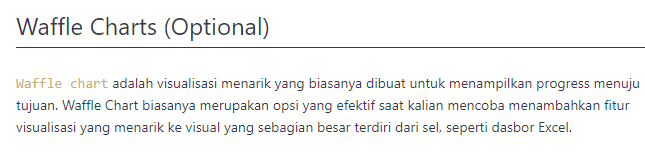

In [104]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


In [105]:
#untuk membuat wafle hal pertama yang dilakukan yaitu menentukan proporsi setiap kategori
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


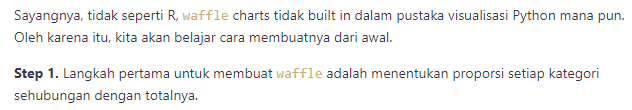

In [106]:
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


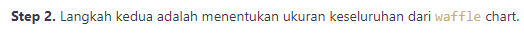

In [107]:
width = 40
height = 10

total_num_tiles = width * height
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


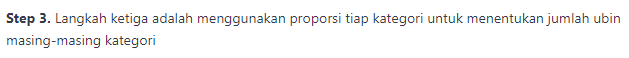

In [108]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


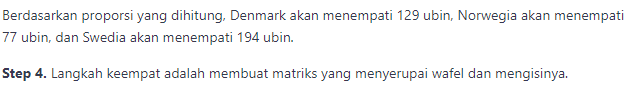

In [109]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range (height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index
        
print('Waffle chart populated!')

Waffle chart populated!


In [110]:
#menampilkan matriks
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

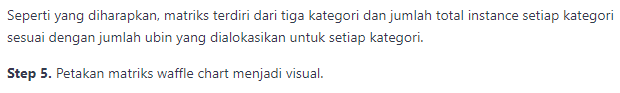

<Figure size 640x480 with 0 Axes>

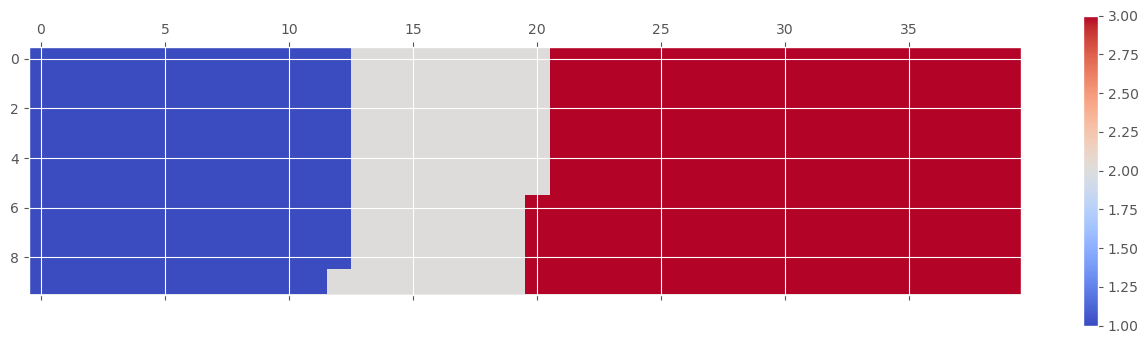

In [111]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 640x480 with 0 Axes>

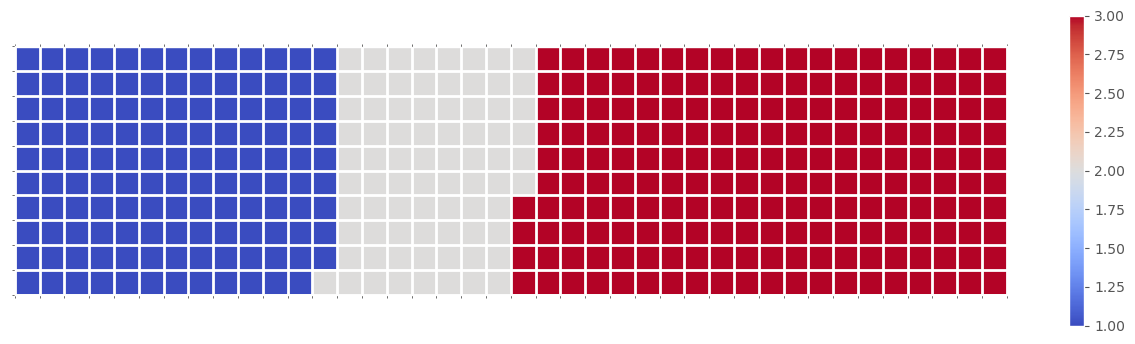

In [112]:
#mempercantik chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor =True)
ax.set_yticks(np.arange(-.5, (height), 1), minor =True)
ax.grid(which = 'minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 640x480 with 0 Axes>

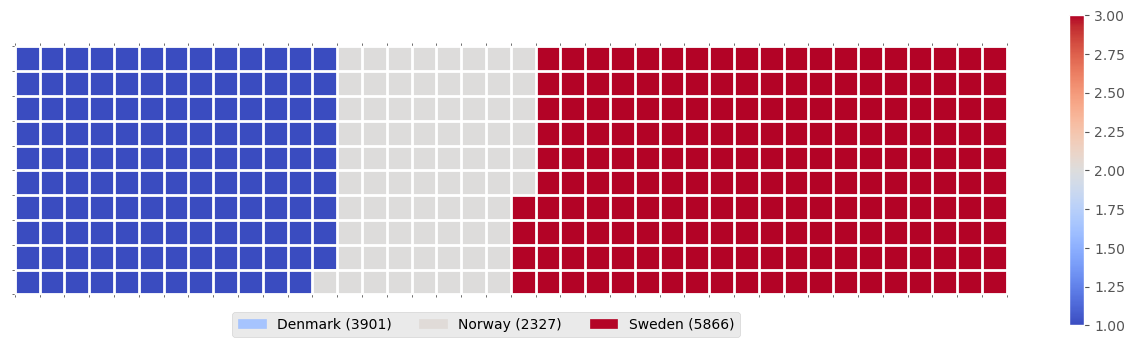

In [113]:

fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(-.5, (width), 1), minor =True)
ax.set_yticks(np.arange(-.5, (height), 1), minor =True)
ax.grid(which = 'minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#menambhakan legend
legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0., -0.2, 0.95, 1))

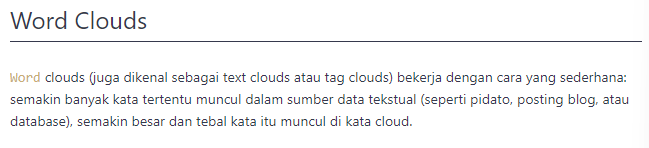

In [114]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
print('wordcloud is installed and import!')

Defaulting to user installation because normal site-packages is not writeable
wordcloud is installed and import!


In [115]:
!pip install seaborn wordcloud folium

Defaulting to user installation because normal site-packages is not writeable


In [117]:
alice_novel = open('alice_novel.txt', 'r').read()
print('File downloaded and saved')

File downloaded and saved


In [119]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

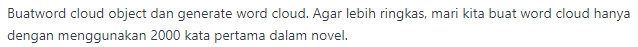

In [120]:
alice_wc = WordCloud(
    background_color='white', 
    max_words=2000, 
    stopwords=stopwords)
alice_wc.generate(alice_novel)

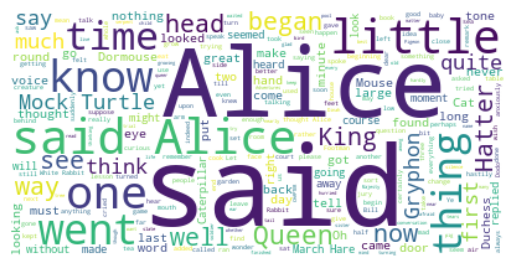

In [121]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

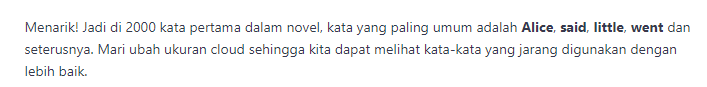

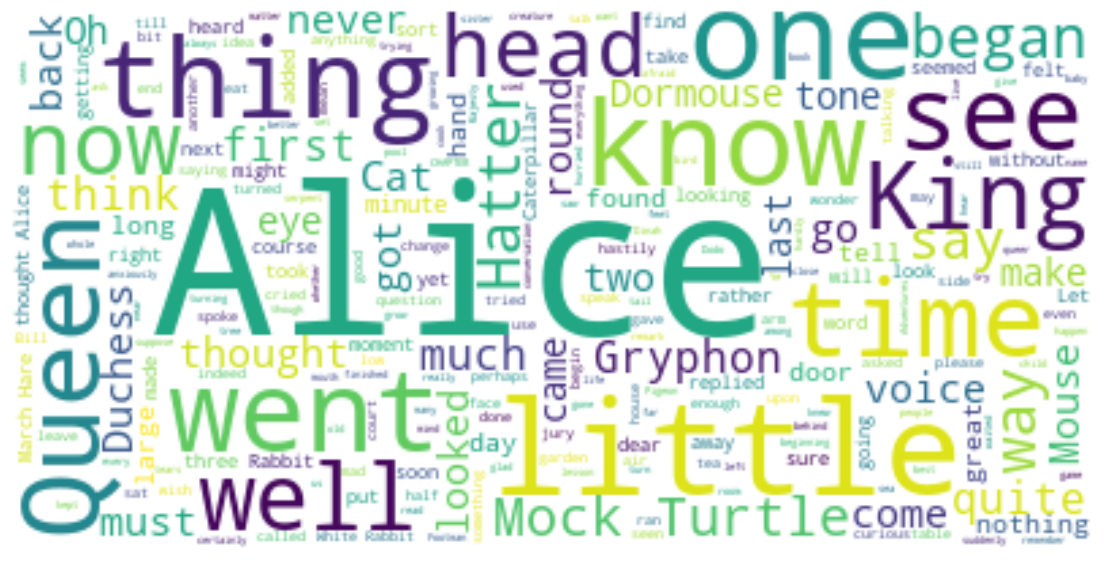

In [122]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [126]:
alice_mask = np.array(Image.open('alice_mask.png'))

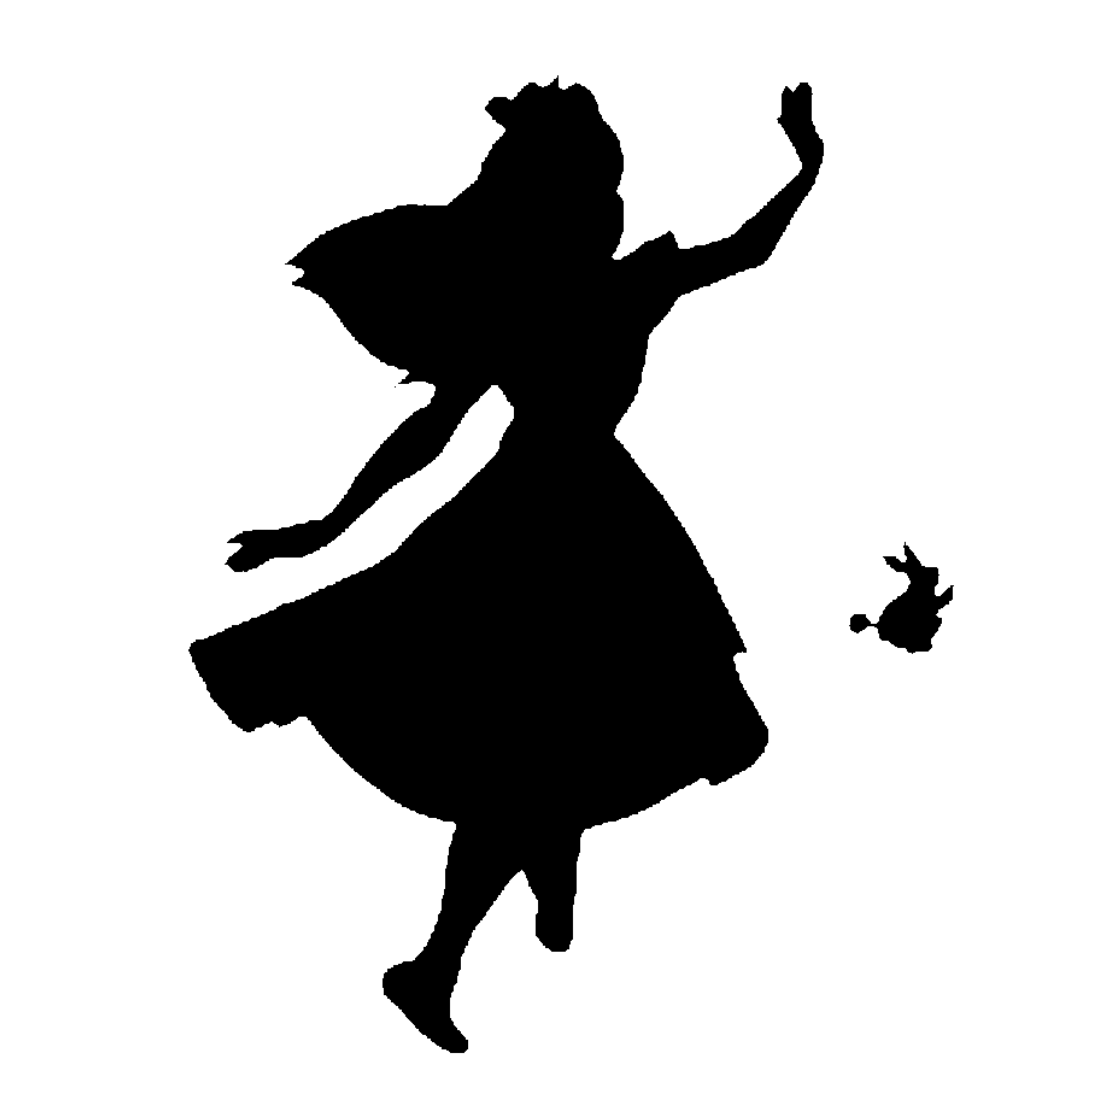

In [127]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

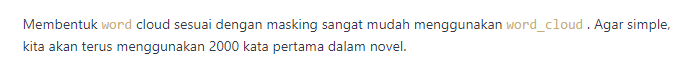

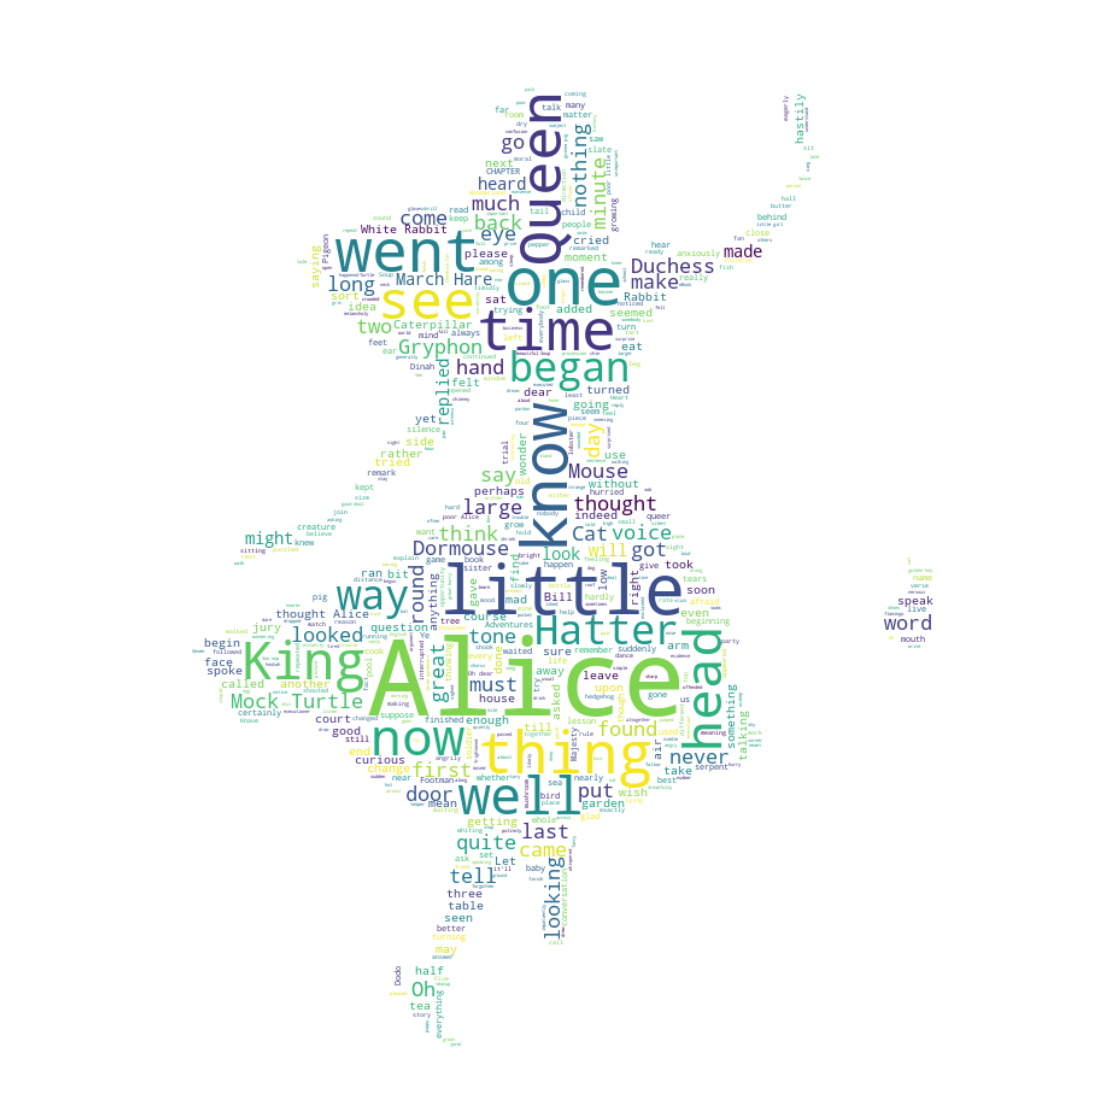

In [133]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

kembali kedata awal

In [134]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [135]:
total_imigration = df_can['Total'].sum()
total_imigration

6409153

In [138]:
max_words=90
word_string = ''
for country in df_can.index.values:
    if len(country.split(' ')) ==1:
        repeat_num_times =int(df_can.loc[country, 'Total']  / float(total_imigration)*max_words)
        word_string = word_string + ((country+ ' ') * repeat_num_times)
        
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [140]:
wordcloud = WordCloud(background_color='white').generate(word_string)

print('world cloud create')

world cloud create


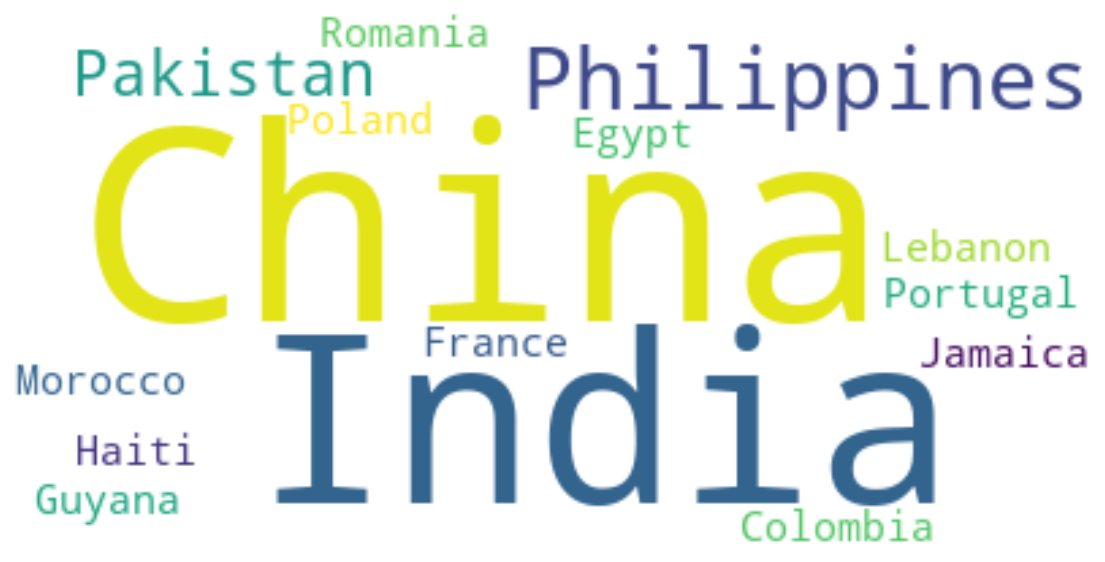

In [142]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

menurut word cloud diatas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. satu visual keren yang bisa dibangun, mungkin menggunakan peta kanada dan masking dan malapiskan word cloud diatas peta kanada. itu akan menjadi visual yang menarik untuk dibangun

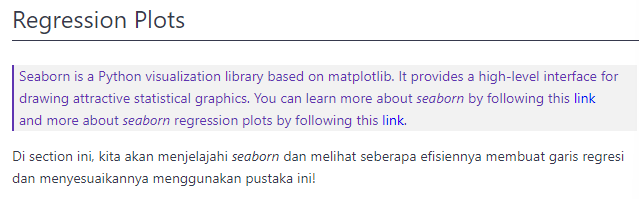

In [143]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [144]:
import seaborn as sns

membuat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke kanada pertahun dari 1980-2013

In [146]:
df_tot = pd.DataFrame (df_can[years].sum(axis=0))

df_tot.index = map(float,df_tot.index)

df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


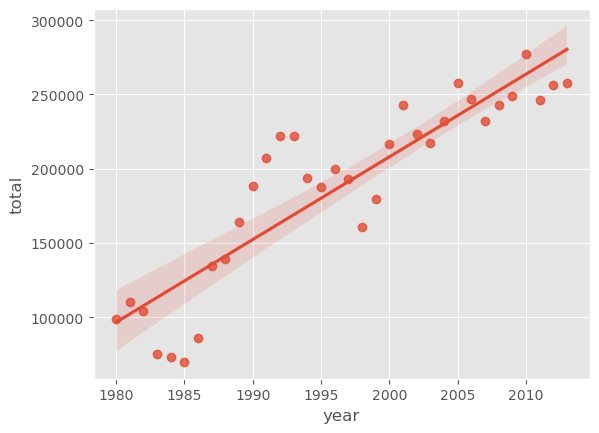

In [147]:
ax = sns.regplot(x='year', y='total', data=df_tot)

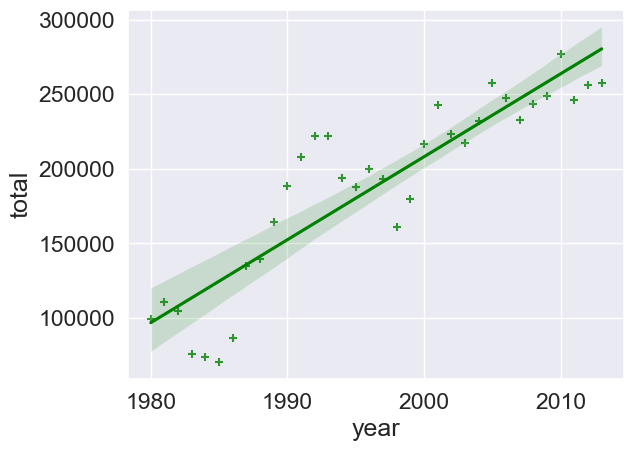

In [155]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

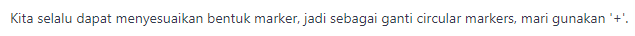

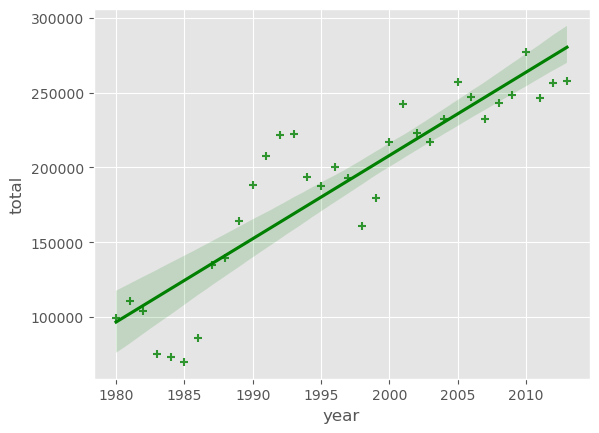

In [149]:
ax = sns.regplot(x='year', y='total', data=df_tot)

memperbesar plot sehingga lebih menarik untuk dilihat

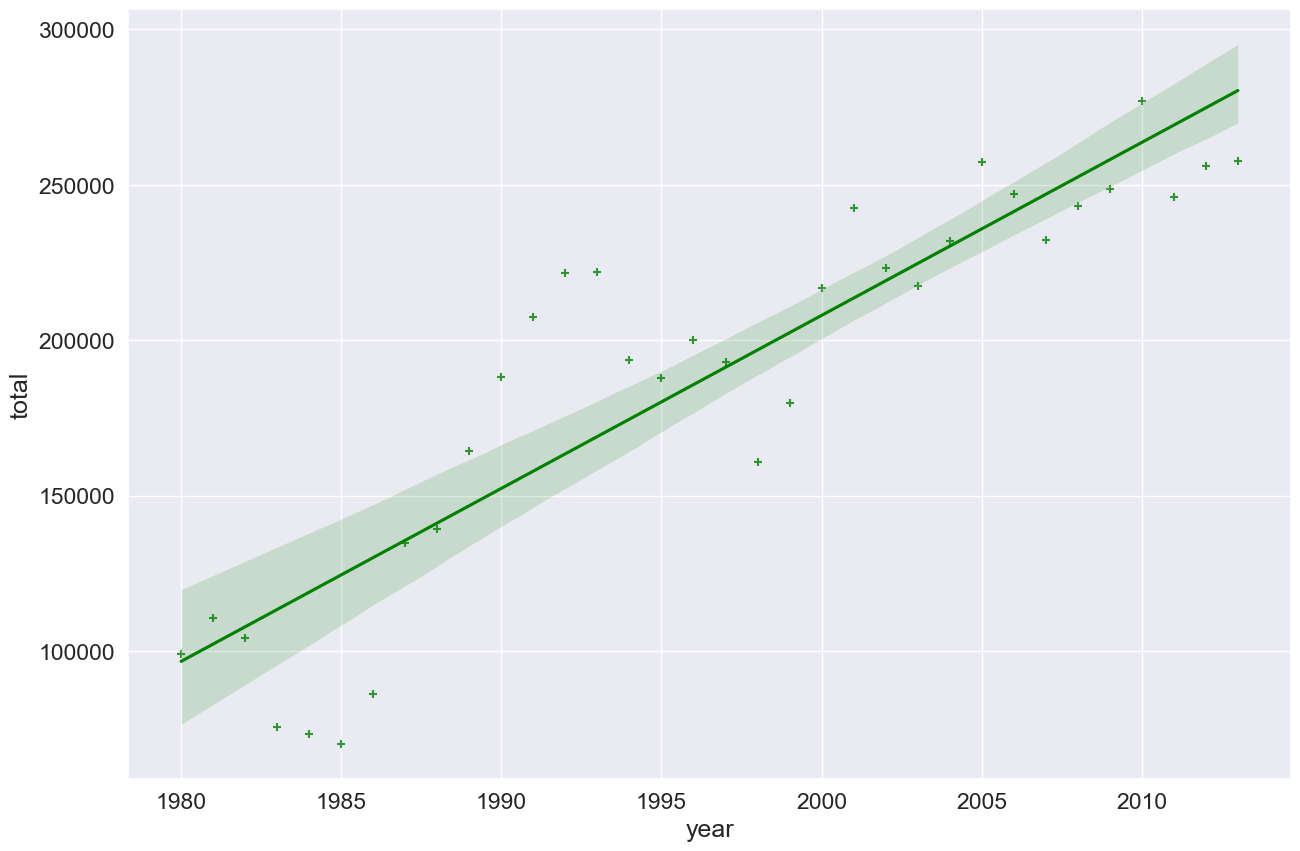

In [156]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')


meningkat kan ukuran marker sehingga cocok dengan ukuran baru dari gambar, serta menambahkan judul serta label x dan y

Text(0.5, 1.0, 'Total imigration to canada from 1980-2013')

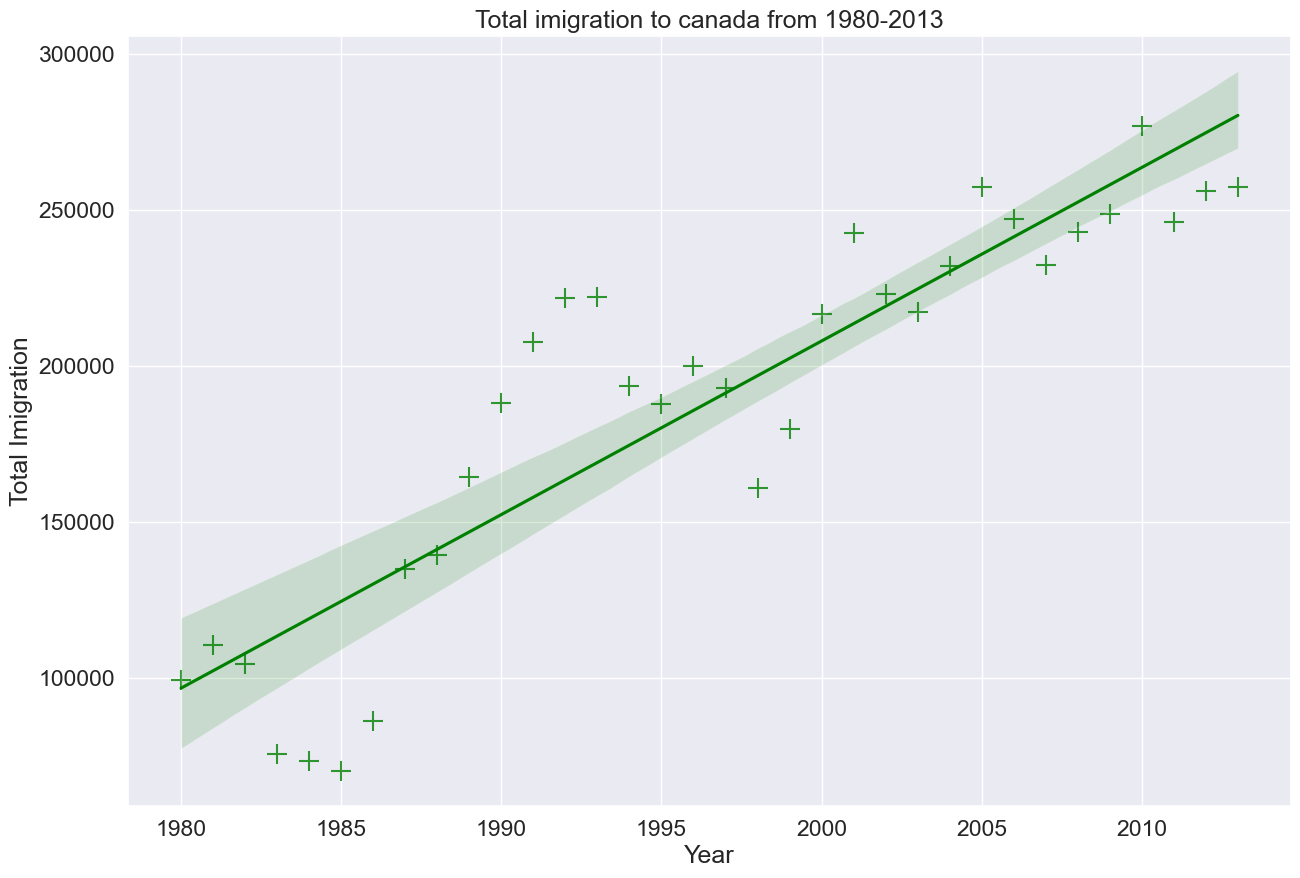

In [165]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Imigration')
ax.set_title('Total imigration to canada from 1980-2013')

meningkatkan ukuran font pada label tanda centang, judul,dan label x dan y agar tidak terlihat berbeda

Text(0.5, 1.0, 'Total imigration to canada from 1980-2013')

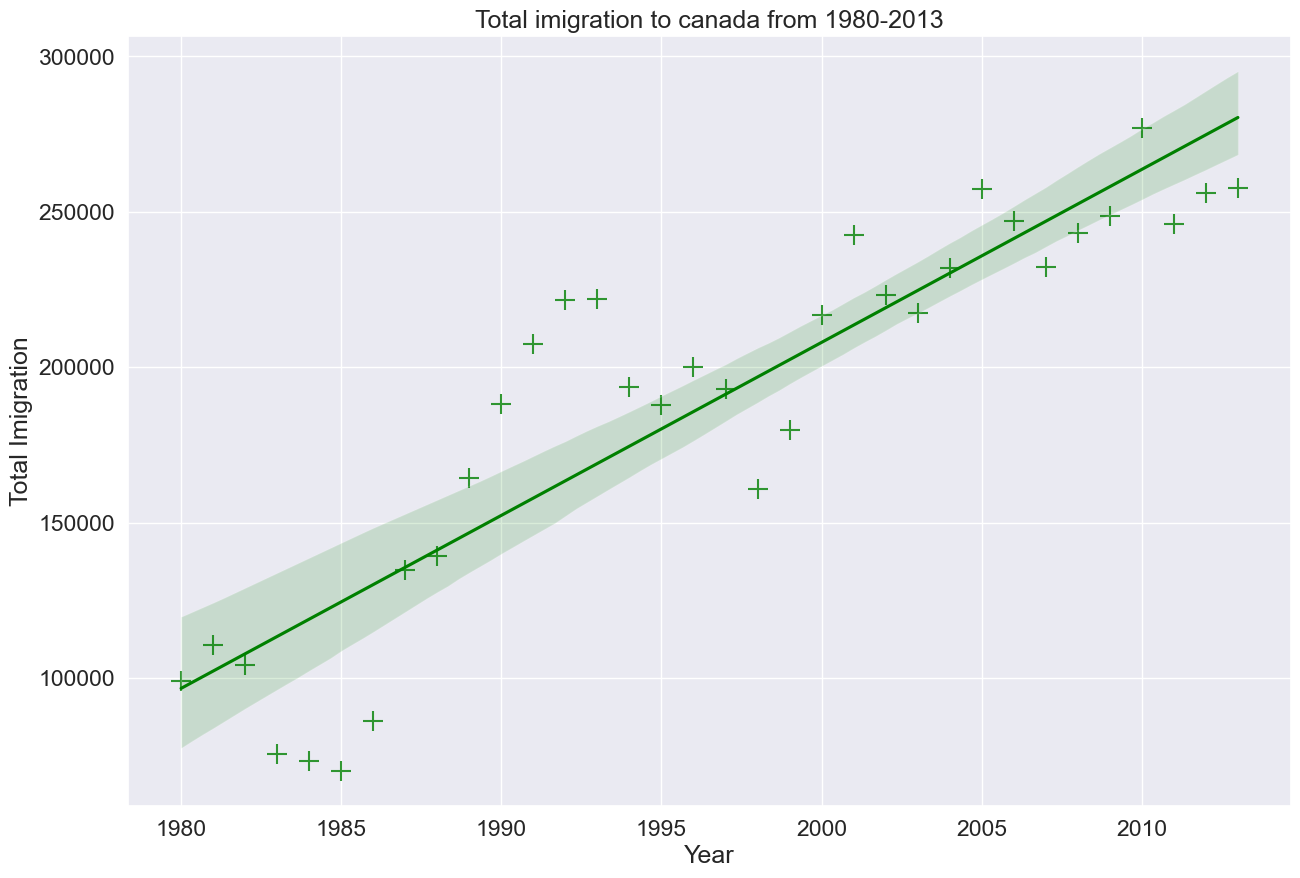

In [166]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Imigration')
ax.set_title('Total imigration to canada from 1980-2013')

mengubah latar belakang menjadi polos putih

Text(0.5, 1.0, 'Total imigration to canada from 1980-2013')

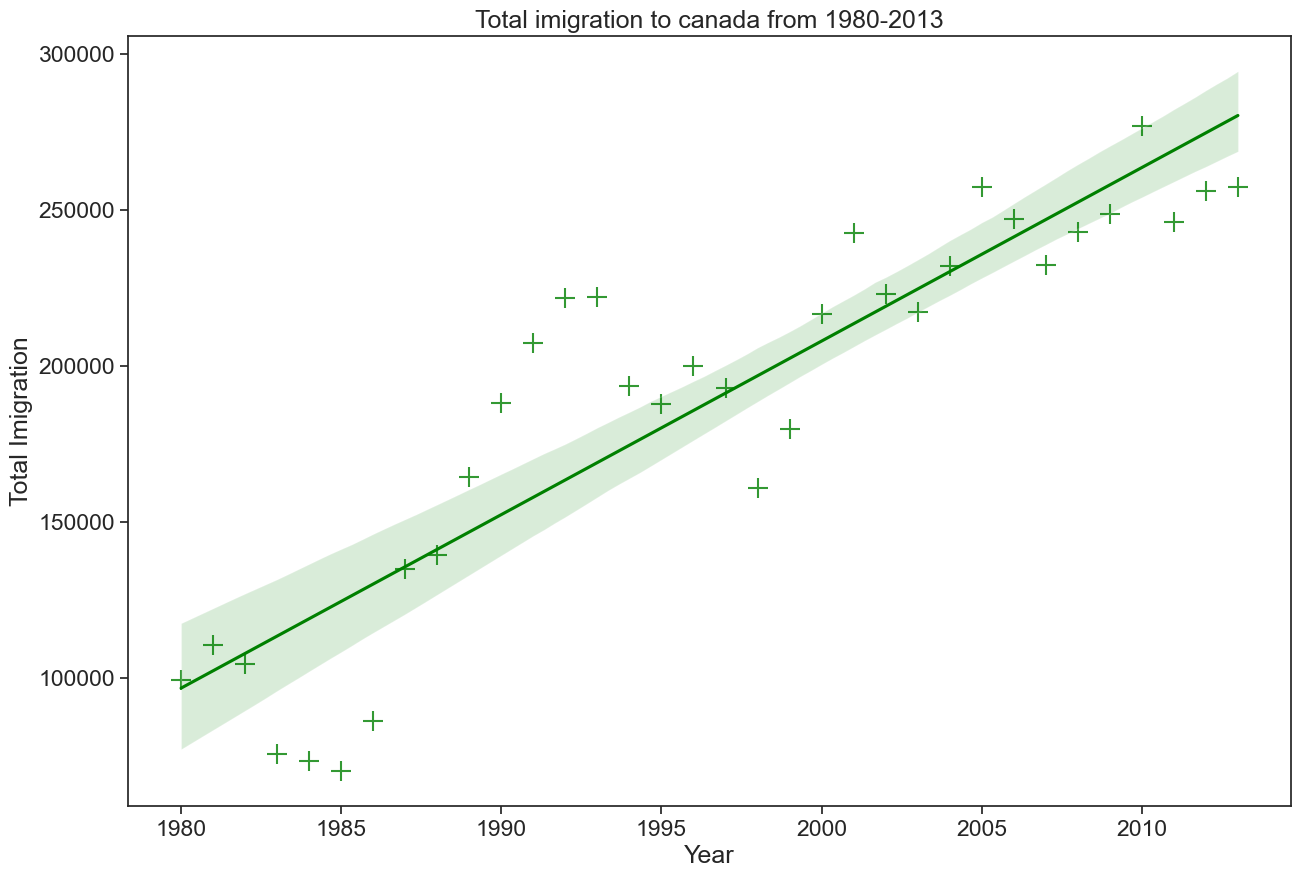

In [167]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('ticks')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Imigration')
ax.set_title('Total imigration to canada from 1980-2013')

latar belakang dengan grid putih

Text(0.5, 1.0, 'Total imigration to canada from 1980-2013')

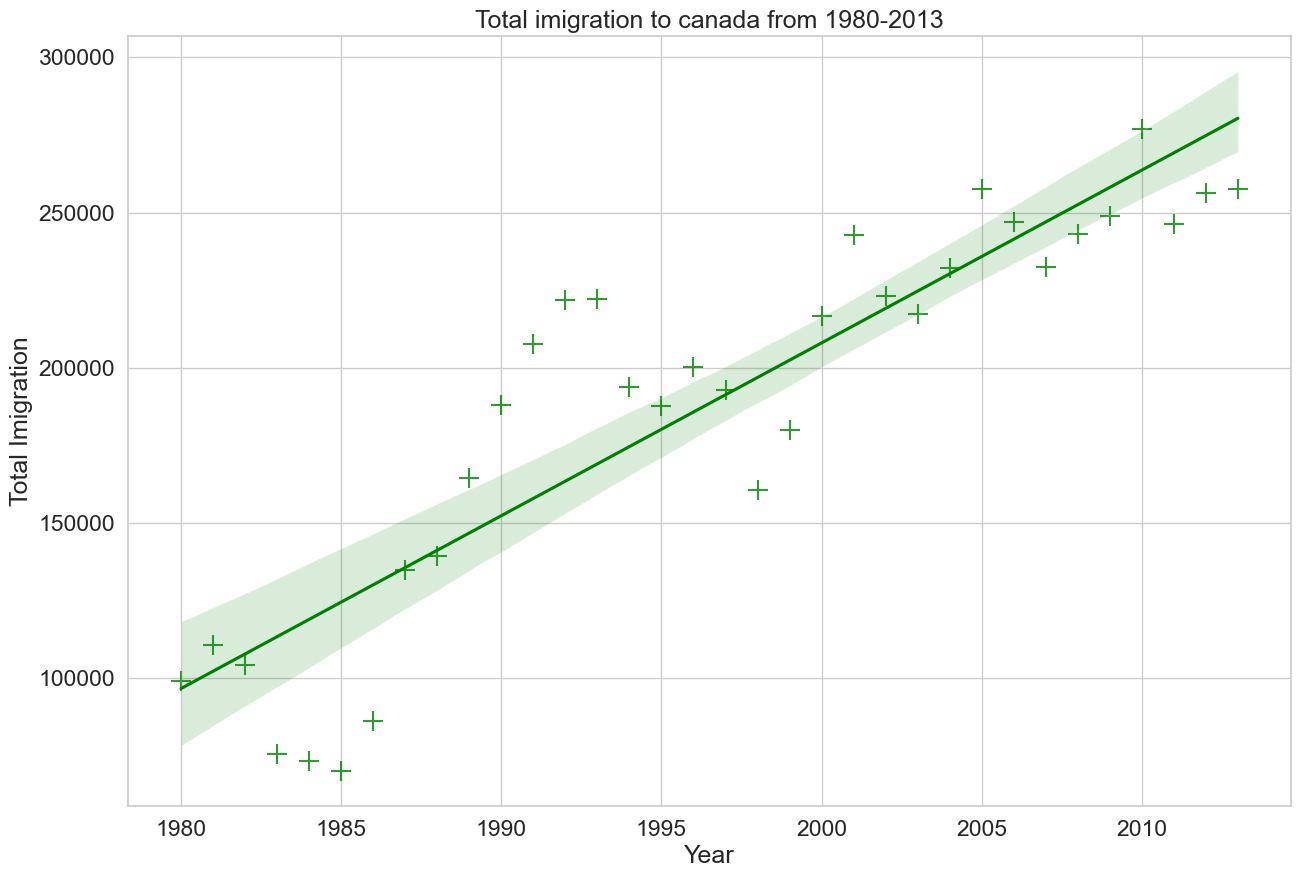

In [168]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Imigration')
ax.set_title('Total imigration to canada from 1980-2013')

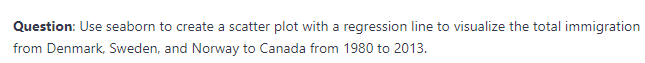

In [169]:
#membuat data frame countries
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()


In [170]:
#membuat total3 negara summing untuk each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

In [172]:
#reset index in place
df_total.reset_index(inplace=True)

In [174]:
#mengubah nama colomns
df_total.columns = ['year', 'total']

In [175]:
#mengubah kolom tahun dari string menjadi int untuk membuat scatter plot
df_total['year'] = df_total['year'].astype(int)

In [177]:
#mengatur ukuran figur, background style dan font size
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Total imigration to canada from 1980-2013')

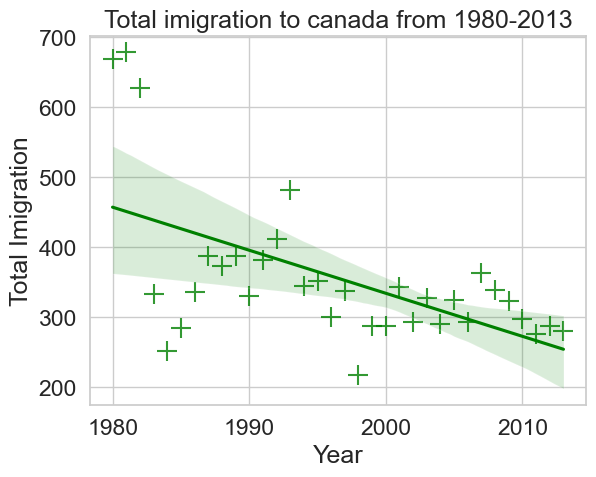

In [179]:
#menggenerate plot dan menambahkan titel dan axes label
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Imigration')
ax.set_title('Total imigration to canada from 1980-2013')